### Cyber Physical Systems

Team Members: 
- Prathamesh Joshi
- Amruta Koshe
- Sobia Khan
- Meet Patel
- Shivani Rana

### Rule of thumb for project 

Class labels and its corresponding class
- 0 is for yawn
- 1 is for no_yawn
- 2 is for Eyes Open
- 3 is for Eyes Closed

# Importing the Necessary Libraries

In [1]:
"""
Importing all the necessary libraries for the project

"""

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os 
import tensorflow as tf 
import cv2
import plotly.express as py
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import f1_score, precision_score, classification_report, accuracy_score, roc_auc_score, recall_score, confusion_matrix,  roc_curve, auc
from tensorflow.keras.utils import img_to_array, load_img, array_to_img

In [2]:
"""
Checking if GPU is avialable on the device for faster processing, if not available the model will run on cpu.
"""

device_name = tf.test.gpu_device_name()
if len(device_name) > 0:
    print("Found GPU at: {}".format(device_name))
else:
    device_name = "/device:CPU:0"
    print("No GPU, using {}.".format(device_name))

Found GPU at: /device:GPU:0


# Visualizing some of the Data from each of 4 classes 

In [3]:
"""
Making a function to view first n images of Open and Close images

You can choose any number of images to plot with their shape but prefer less otherwise it will print all in the notebook

"""
def sanity_check(class_name:str, n:int):
    for i in range(n):
        view_img = plt.imread("Dataset/"+str(class_name)+"/_"+str(i)+".jpg")
        print(view_img.shape)
        plt.imshow(view_img)
        plt.show()

(145, 145, 3)


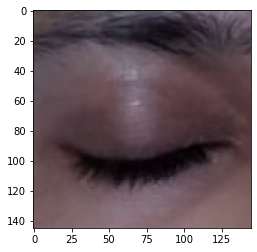

(135, 142, 3)


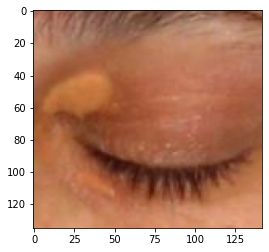

In [4]:
sanity_check("Closed", 2)

(175, 175, 3)


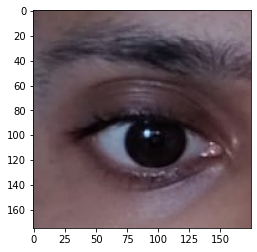

(86, 88, 3)


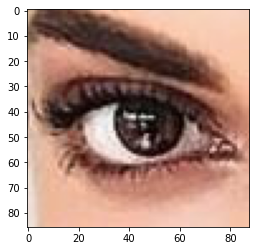

(127, 127, 3)


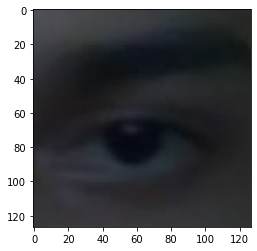

(102, 102, 3)


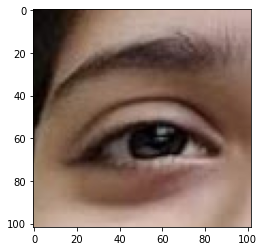

(300, 533, 3)


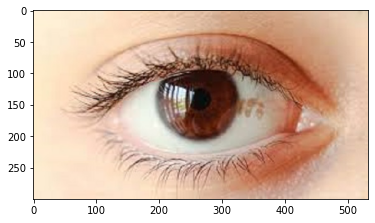

In [5]:
# Checking Open images

sanity_check("Open", 5)

In [6]:
"""
Making a function to view first n images of Yawn and No_yawn images

You can choose any number of images to plot with their shape but prefer less otherwise it will print all in the notebook

The index starts from 1 here and goes to n+1 as images are from 1 and not 0 index.

"""
def sanity_check_yawn(class_name:str, n:int):
    for i in range(1, n+1):
        view_img = plt.imread("Dataset/"+str(class_name)+"/"+str(i)+".jpg")
        print(view_img.shape)
        plt.imshow(view_img)
        plt.show()

(480, 640, 3)


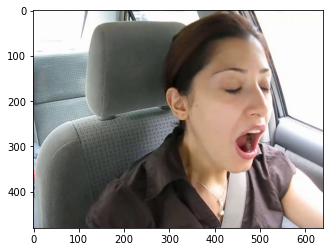

(480, 640, 3)


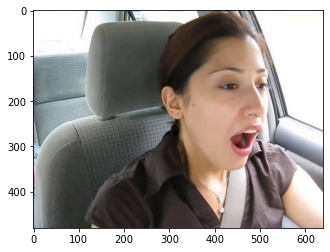

(480, 640, 3)


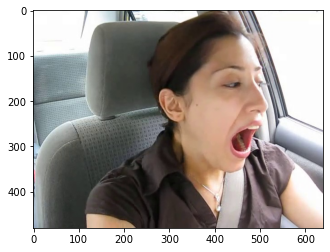

(480, 640, 3)


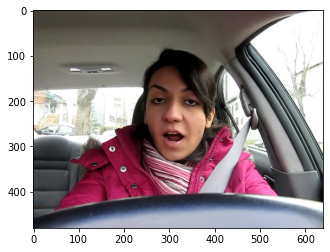

(480, 640, 3)


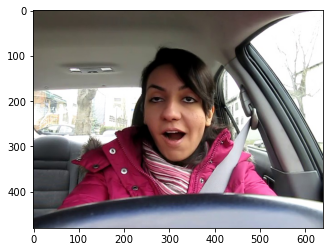

In [7]:
sanity_check_yawn("yawn", 5)

(480, 640, 3)


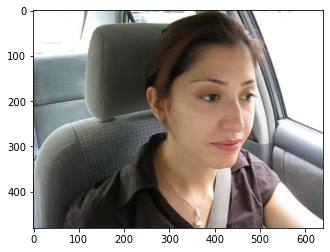

(480, 640, 3)


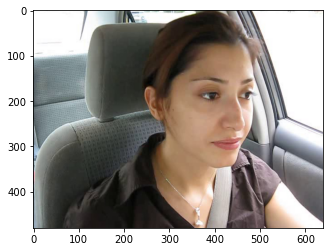

(480, 640, 3)


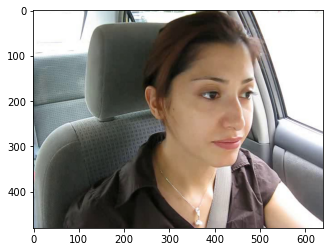

(480, 640, 3)


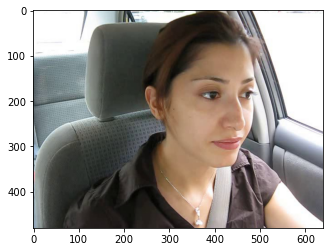

(480, 640, 3)


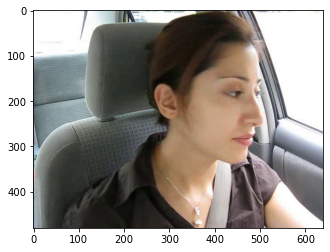

In [8]:
sanity_check_yawn("no_yawn" , 5)

#### Function for mapping images with corresponding labels and rescaling, reshaping the images to 128 or 256

In [9]:
IMAGE_SIZE = 256

In [10]:
def datamaker(direc_path="Dataset/"):
    data = []
    labels = ["yawn", "no_yawn","Open","Closed"]
    for label in labels:
        final_path = os.path.join(direc_path, label)
        class_num = labels.index(label)
        print(class_num)
        for image in os.listdir(final_path):
            image_array = cv2.imread(os.path.join(final_path, image))
            rgb_image_array = cv2.cvtColor(image_array, cv2.COLOR_BGR2RGB)  # conver BGR to RGB 
            scaled_image_array = rgb_image_array/255.0     # Rescaling the images 
            resized_array = cv2.resize(scaled_image_array, (IMAGE_SIZE, IMAGE_SIZE))   # Reshaping the images
            data.append([resized_array, class_num])
    return data


Our_data = datamaker()

0
1
2
3


##### So basically 
- 0 is for yawn
- 1 is for no_yawn
- 2 is for Eyes Open
- 3 is for Eyes Closed

In [11]:
len(Our_data)

2900

In [12]:
Our_data[100]

[array([[[0.25098039, 0.23137255, 0.20784314],
         [0.24258578, 0.22297794, 0.19944853],
         [0.23756127, 0.21795343, 0.19442402],
         ...,
         [0.96636029, 0.96636029, 0.96636029],
         [0.99534314, 0.99534314, 0.99534314],
         [1.        , 1.        , 1.        ]],
 
        [[0.25098039, 0.23137255, 0.20784314],
         [0.2463848 , 0.22677696, 0.20324755],
         [0.24313725, 0.22352941, 0.2       ],
         ...,
         [0.99748775, 0.99748775, 0.99748775],
         [1.        , 1.        , 1.        ],
         [0.9963848 , 0.9963848 , 0.9963848 ]],
 
        [[0.25042892, 0.23082108, 0.20729167],
         [0.24705882, 0.22745098, 0.20392157],
         [0.24705882, 0.22745098, 0.20392157],
         ...,
         [0.99944853, 0.99944853, 0.99944853],
         [1.        , 1.        , 1.        ],
         [0.99963235, 0.99963235, 0.99963235]],
 
        ...,
 
        [[0.08161765, 0.09338235, 0.12867647],
         [0.09044118, 0.10220588, 0.1375 

##### Making X as features and y as labels for our dataset and then splitting for train, validation and test.

In [13]:
import random

x = []
y = []

random.shuffle(Our_data)

for features, labelid in Our_data:
    x.append(features)
    y.append(labelid)

In [14]:
X = np.array(x)
Y = np.array(y)

In [15]:
X.shape

(2900, 256, 256, 3)

In [16]:
Y.shape

(2900,)

In [17]:
X_train, X_temp, y_train, y_temp = train_test_split(X, Y, test_size=0.30, stratify=Y)

In [18]:
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp)

In [19]:
"""
This is our dataset and now we can do data augmentation and training set but not on validation

Validation set is used to see the hyperparameter

Test set is totally separated and will be used for testing the model only

"""

print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(2030, 256, 256, 3)
(2030,)
(435, 256, 256, 3)
(435,)
(435, 256, 256, 3)
(435,)


In [20]:
batch_size = 16

In [21]:
train_generator = ImageDataGenerator(rotation_range=20,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest')

val_generator = ImageDataGenerator()

test_generator = ImageDataGenerator()

In [22]:
train_gen_flow = train_generator.flow(x=np.array(X_train), y=y_train, batch_size=batch_size, shuffle=True)

val_gen_flow = val_generator.flow(x=X_val, y=y_val, batch_size=batch_size, shuffle=False)

test_gen_flow = test_generator.flow(x=X_test, y=y_test, batch_size=batch_size, shuffle=False)

In [23]:
len(train_gen_flow)

127

#### Visualizing augmented samples

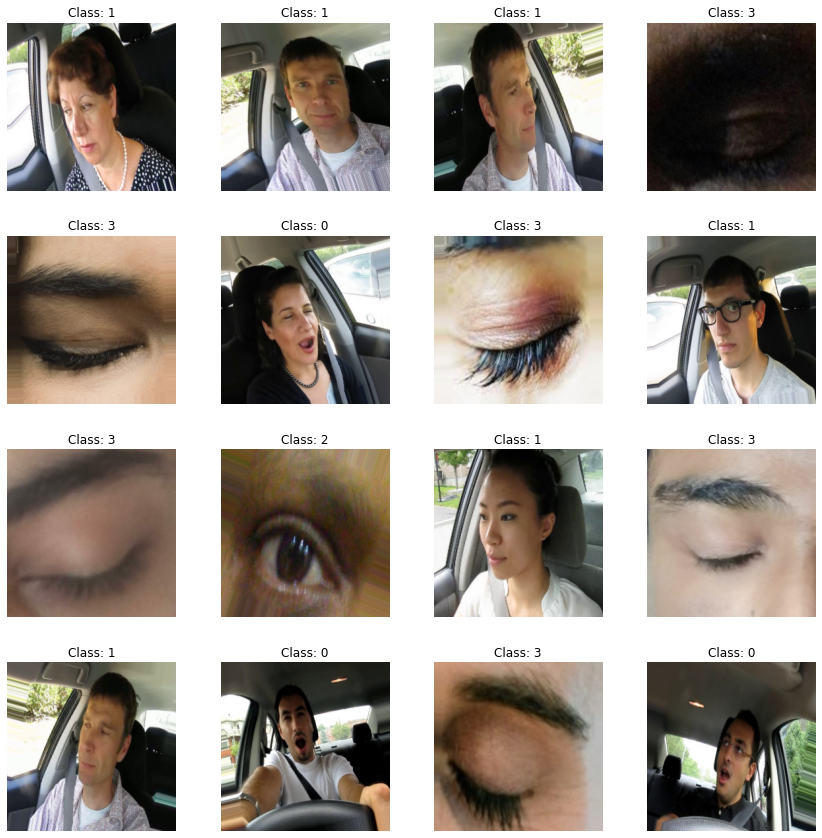

In [24]:
fig, ax = plt.subplots(4, 4, figsize=(12, 12))
fig.tight_layout()

# Number of batches to visualize    - reference from Stackoverflow.
num_batches_to_visualize = 3

for batch_idx in range(num_batches_to_visualize):
    # Get a batch of augmented images and labels
    X_batch, y_batch = next(train_gen_flow)
    
    # Plot the images in the current batch
    for i in range(4):
        for j in range(4):
            ax[i, j].imshow(X_batch[i * 4 + j])
            ax[i, j].set_title(f"Class: {y_batch[i * 4 + j]}")
            ax[i, j].axis("off")
    
    plt.show()

The length of the train_generator does not necessarily reflect the actual number of training samples after augmentation. Instead, it reflects the number of batches generated by the generator.

Each batch generated by the train_generator contains batch_size samples, and the total number of batches generated per epoch is determined by the formula:

##### Total training data = Number of epochs * Number of original training samples
##### Total training data = 50 * 2030  ------ if we assume 50 epochs
##### Total training data = 101500

# Creating a Model and Training

In [25]:
from tensorflow.keras import models, layers

In [26]:
models = models.Sequential([
    
    layers.Conv2D(64, (3, 3), activation="relu", input_shape = (IMAGE_SIZE,IMAGE_SIZE,3)),
    layers.MaxPooling2D(2, 2),
    
    layers.Conv2D(128, (3, 3), activation="relu"),
    layers.MaxPooling2D(2, 2),
    
    layers.Conv2D(256, (3, 3), activation="relu"),
    layers.MaxPooling2D(2, 2),
    
    layers.Conv2D(128, (3, 3), activation="relu"),
    layers.MaxPooling2D(2, 2),

    layers.Dense(64, activation="relu"),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dropout(0.5),
    
    layers.Dense(4, activation="softmax")
])

In [27]:
models.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 128)     73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 256)       295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 256)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 128)       2

In [28]:
models.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [29]:
history = models.fit(
    train_gen_flow,
    epochs = 20,
    verbose =1,
    shuffle = True,
    validation_data = val_gen_flow
)

Epoch 1/20
127/127 [==============================] - 29s 183ms/step - loss: 0.9147 - accuracy: 0.5542 - val_loss: 0.6068 - val_accuracy: 0.6828
Epoch 2/20
127/127 [==============================] - 21s 164ms/step - loss: 0.5557 - accuracy: 0.7355 - val_loss: 0.4482 - val_accuracy: 0.7793
Epoch 3/20
127/127 [==============================] - 20s 159ms/step - loss: 0.4773 - accuracy: 0.7665 - val_loss: 0.4745 - val_accuracy: 0.7379
Epoch 4/20
127/127 [==============================] - 20s 160ms/step - loss: 0.4620 - accuracy: 0.7719 - val_loss: 0.3816 - val_accuracy: 0.8092
Epoch 5/20
127/127 [==============================] - 24s 191ms/step - loss: 0.4348 - accuracy: 0.7808 - val_loss: 0.3802 - val_accuracy: 0.8184
Epoch 6/20
127/127 [==============================] - 27s 213ms/step - loss: 0.4086 - accuracy: 0.7897 - val_loss: 0.4664 - val_accuracy: 0.7425
Epoch 7/20
127/127 [==============================] - 23s 178ms/step - loss: 0.4100 - accuracy: 0.7966 - val_loss: 0.3642 - val_ac

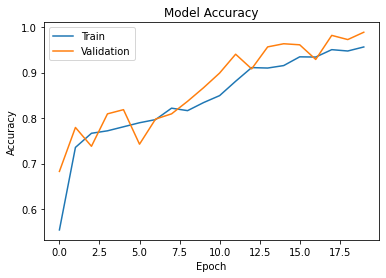

In [30]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

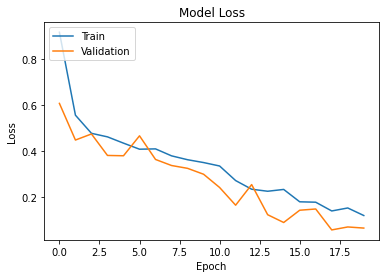

In [31]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [32]:
scores = models.evaluate(test_gen_flow)

28/28 [==============================] - 1s 17ms/step - loss: 0.0865 - accuracy: 0.9678


In [33]:
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Test loss: 0.08649587631225586
Test accuracy: 0.9678161144256592


In [34]:
y_pred = models.predict(X_test)

In [35]:
y_pred_class = np.argmax(y_pred, axis=1)

In [36]:
y_pred_class

array([3, 3, 3, 2, 0, 1, 2, 2, 2, 1, 2, 0, 0, 3, 1, 3, 0, 3, 3, 1, 3, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 3, 3, 2, 0, 2, 3, 1, 3, 3, 0, 2, 1, 1, 1,
       2, 2, 2, 1, 0, 0, 1, 3, 0, 1, 2, 2, 3, 2, 3, 1, 0, 2, 3, 0, 1, 3,
       2, 0, 3, 1, 0, 0, 3, 0, 3, 2, 1, 2, 2, 2, 0, 1, 2, 3, 2, 0, 0, 3,
       0, 0, 0, 3, 0, 2, 3, 0, 1, 2, 0, 1, 1, 2, 1, 1, 1, 3, 2, 3, 2, 1,
       2, 1, 2, 1, 1, 0, 3, 3, 3, 0, 1, 0, 3, 2, 2, 3, 3, 3, 3, 2, 0, 1,
       3, 0, 0, 2, 1, 1, 1, 3, 1, 1, 3, 2, 3, 1, 2, 1, 2, 2, 3, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 3, 1, 2, 1, 0, 0, 3, 0, 2, 3, 3, 0,
       2, 2, 0, 1, 2, 3, 2, 1, 2, 2, 0, 0, 1, 0, 3, 2, 2, 3, 0, 0, 2, 3,
       2, 1, 0, 3, 1, 1, 2, 3, 1, 0, 2, 3, 0, 3, 2, 0, 3, 0, 1, 0, 2, 1,
       1, 3, 1, 0, 1, 2, 0, 0, 1, 3, 0, 3, 1, 2, 0, 1, 3, 1, 0, 1, 0, 0,
       0, 0, 3, 2, 1, 3, 2, 3, 1, 1, 0, 2, 3, 0, 2, 2, 1, 0, 0, 2, 2, 3,
       2, 1, 1, 0, 0, 1, 3, 3, 2, 3, 2, 0, 3, 2, 3, 1, 3, 3, 3, 3, 1, 3,
       3, 1, 2, 3, 0, 2, 3, 2, 2, 1, 2, 3, 0, 2, 2,

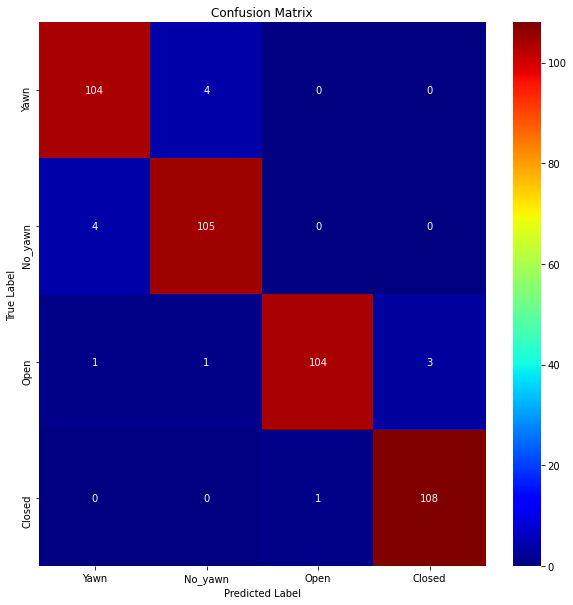

In [37]:
conf_matrix = confusion_matrix(y_test, y_pred_class)

plt.figure(figsize=(10, 10))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap="jet", xticklabels=['Yawn', 'No_yawn', 'Open', 'Closed'], yticklabels=['Yawn', 'No_yawn', 'Open', 'Closed'])
plt.title("Confusion Matrix")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [38]:
# Classification Report
class_report = classification_report(y_test, y_pred_class)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.96       108
           1       0.95      0.96      0.96       109
           2       0.99      0.95      0.97       109
           3       0.97      0.99      0.98       109

    accuracy                           0.97       435
   macro avg       0.97      0.97      0.97       435
weighted avg       0.97      0.97      0.97       435



In [39]:

# Accuracy Precision, Recall, F1-Score
precision = precision_score(y_test, y_pred_class, average='weighted')
recall = recall_score(y_test, y_pred_class, average='weighted')
f1 = f1_score(y_test, y_pred_class, average='weighted')
accuracy = accuracy_score(y_test, y_pred_class)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Accuracy: 0.967816091954023
Precision: 0.9680627239564286
Recall: 0.967816091954023
F1-Score: 0.9678238904005082


In [40]:
auc_score = roc_auc_score(y_test, y_pred, multi_class='ovr')
print("AUC:", auc_score)

AUC: 0.9992030758925377


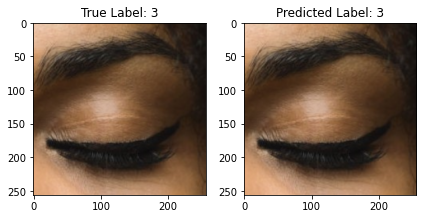

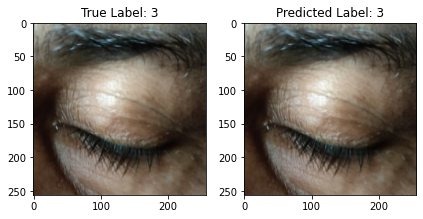

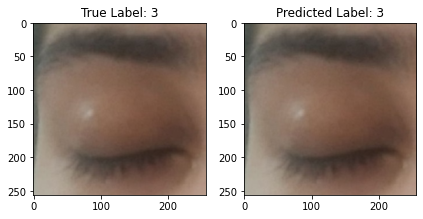

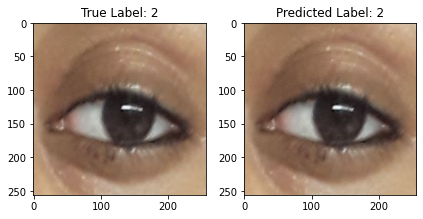

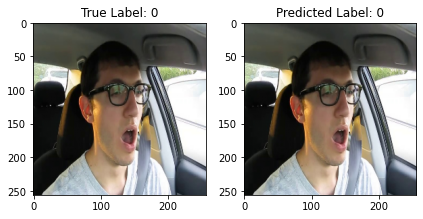

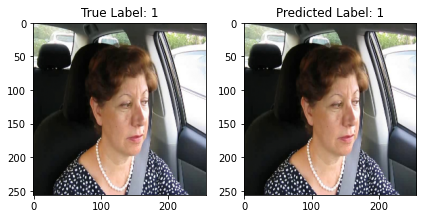

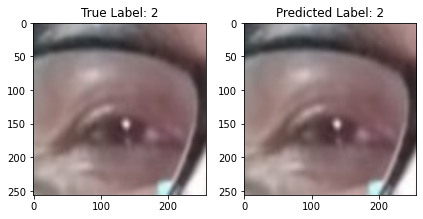

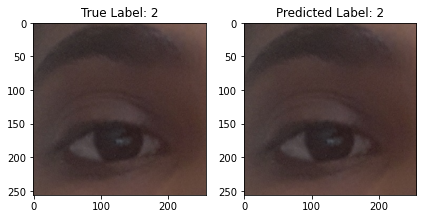

In [41]:
for idx in range(0, 8):
    image = X_test[idx]  # Assuming X_test contains your images
    true_label = y_test[idx]
    predicted_label = y_pred_class[idx]
    
    plt.figure(figsize=(6, 3))
    
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title(f'True Label: {true_label}')
    
    plt.subplot(1, 2, 2)
    plt.imshow(image)
    plt.title(f'Predicted Label: {predicted_label}')
    
    plt.tight_layout()
    plt.show()


In [42]:
models.save("group.h5")